In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


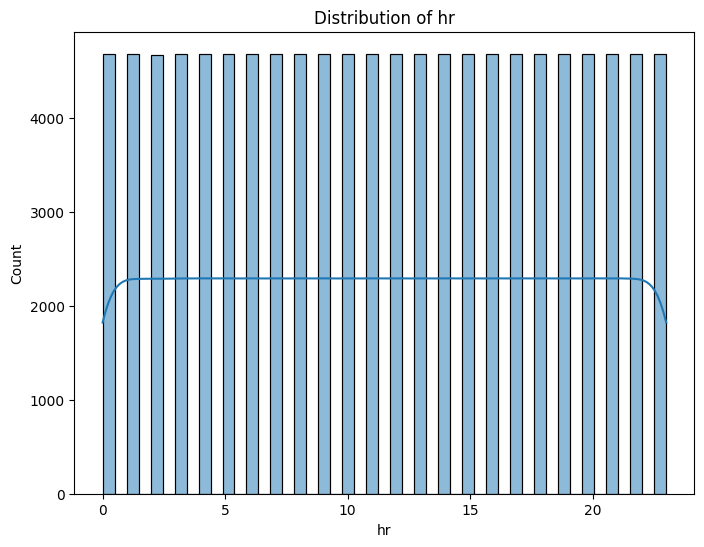

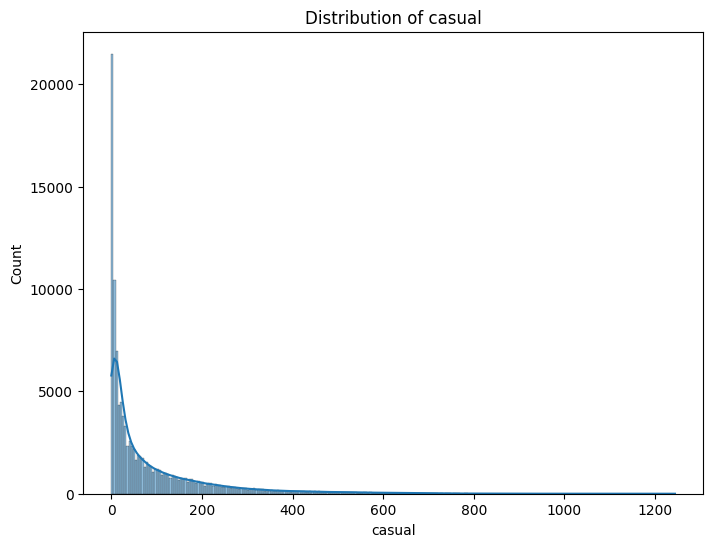

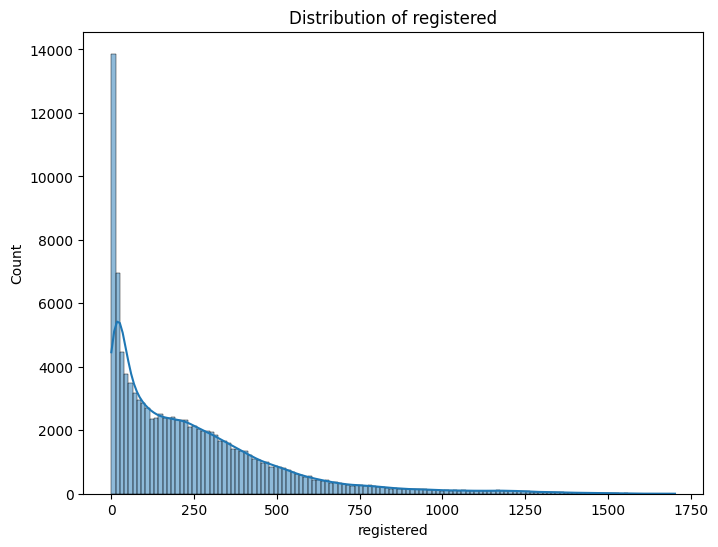

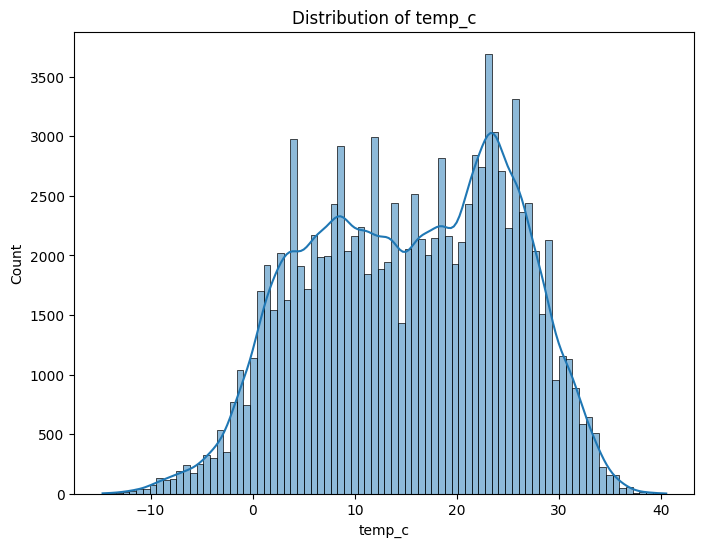

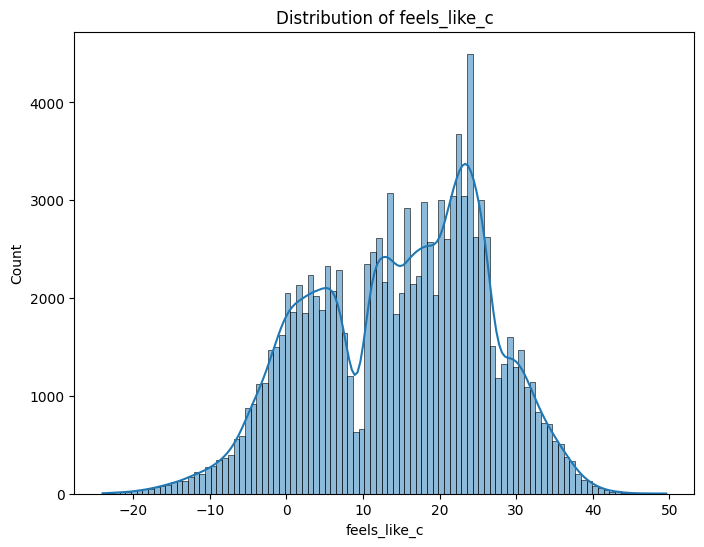

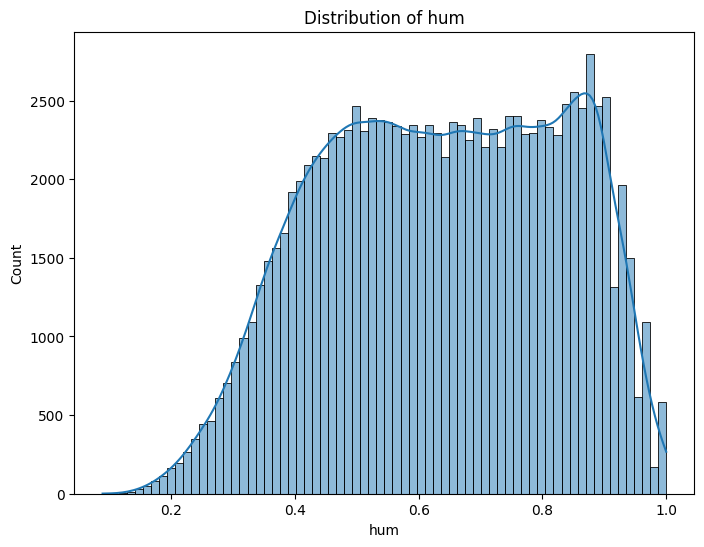

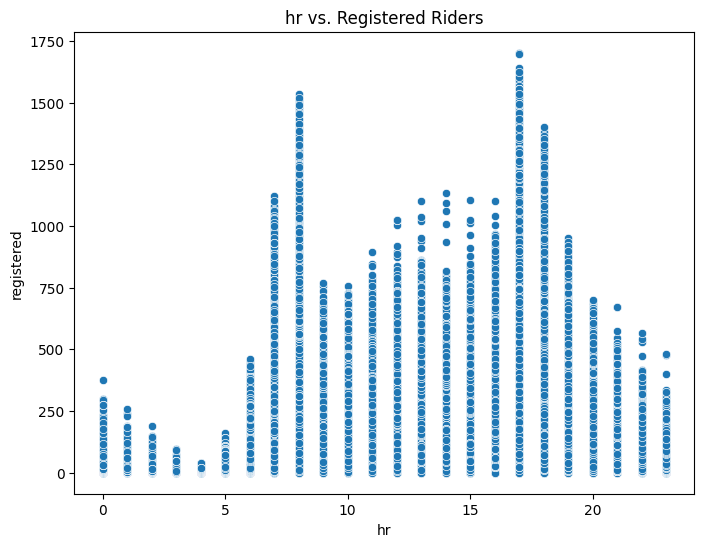

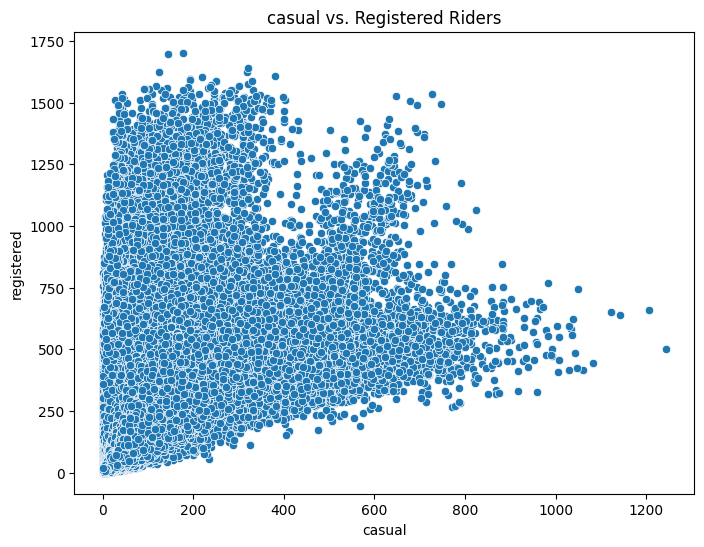

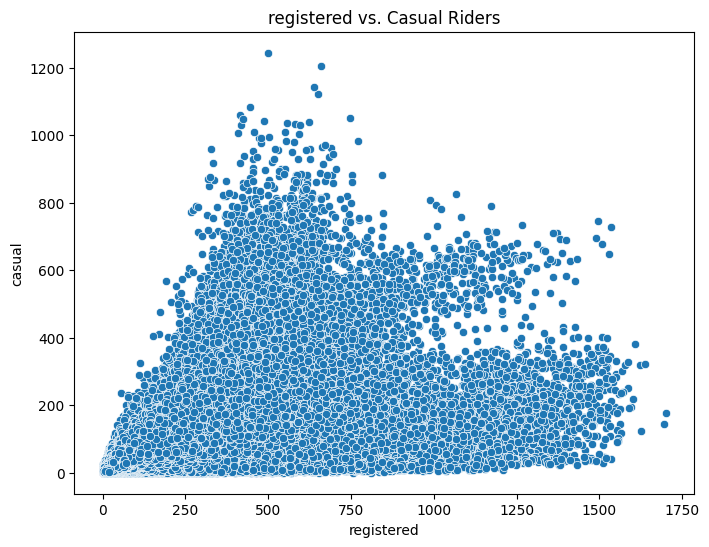

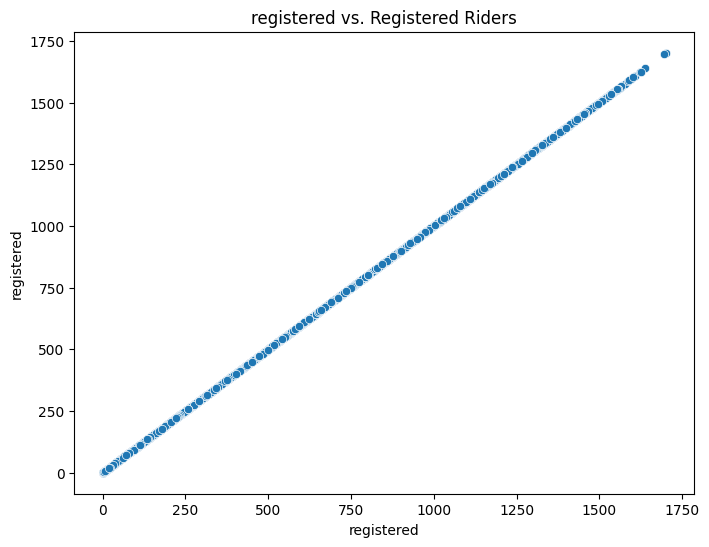

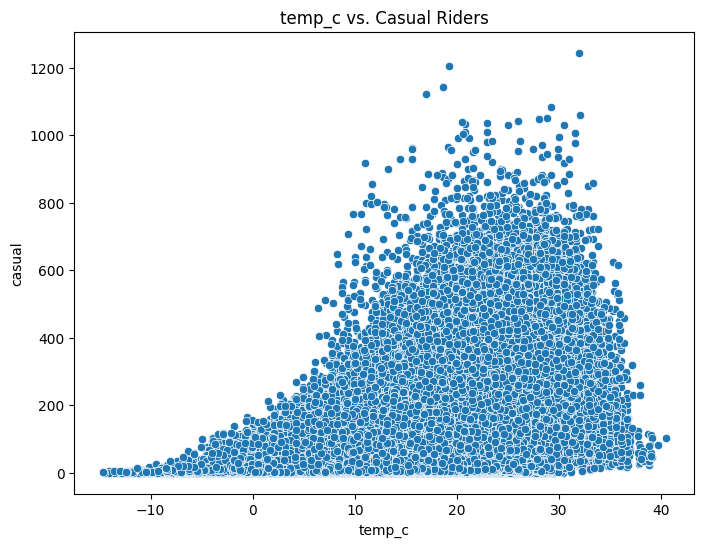

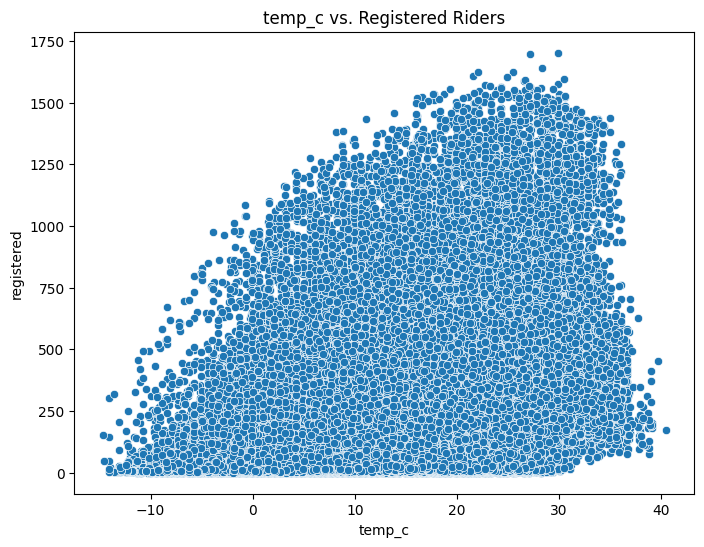

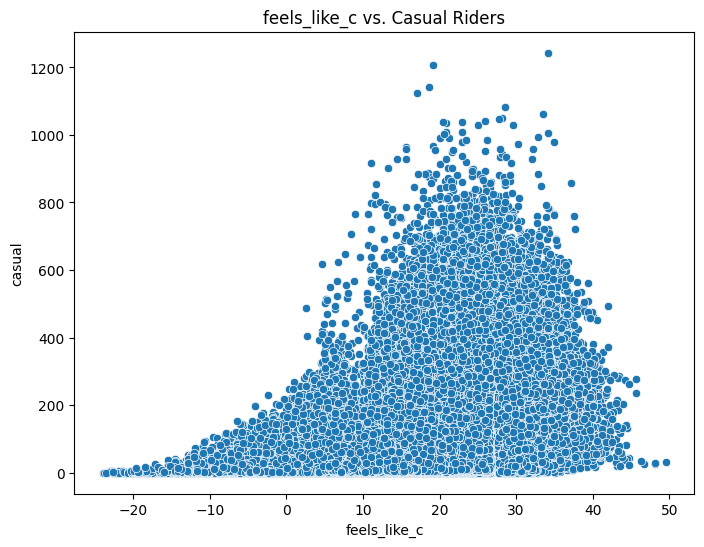

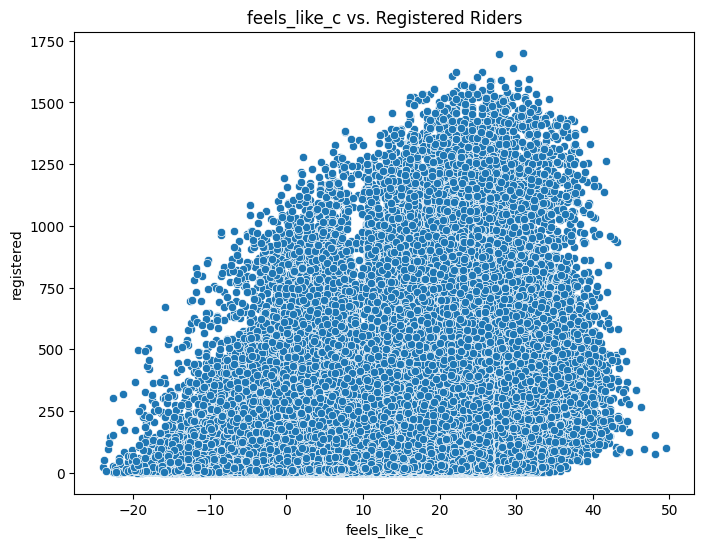

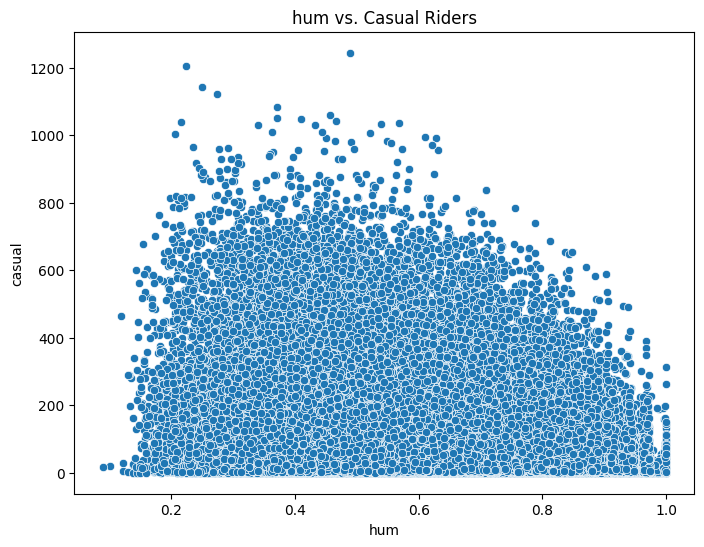

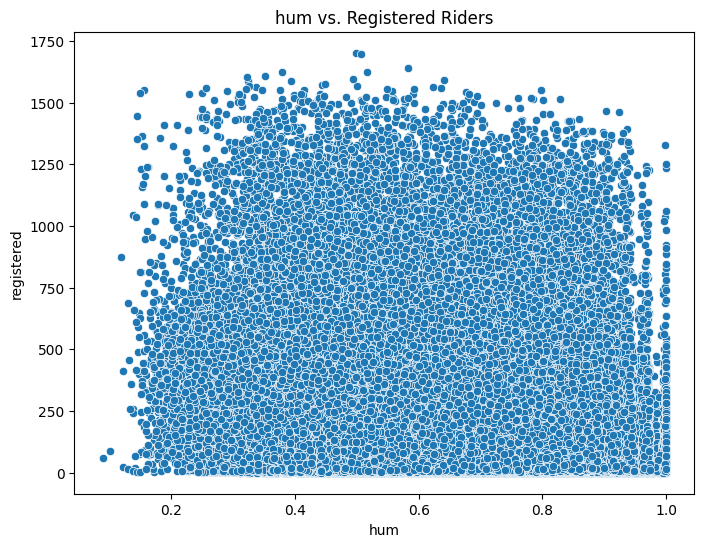

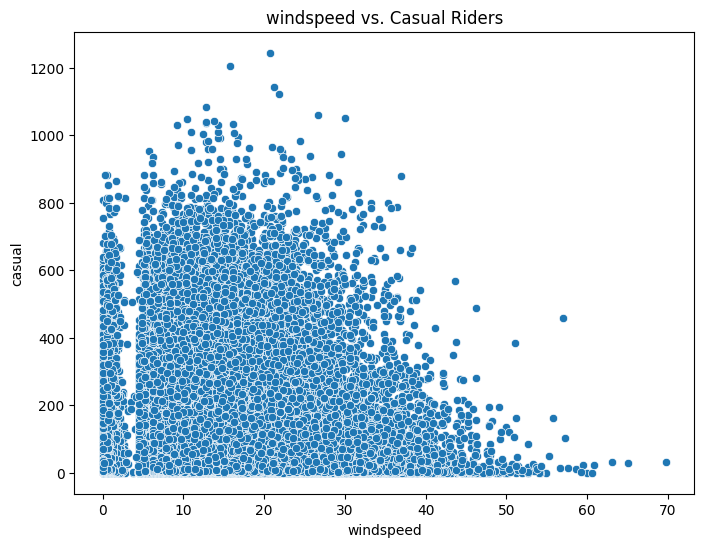

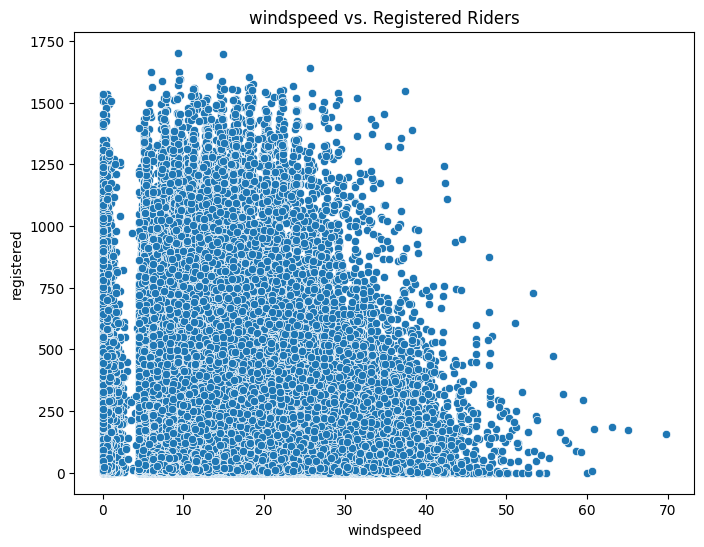

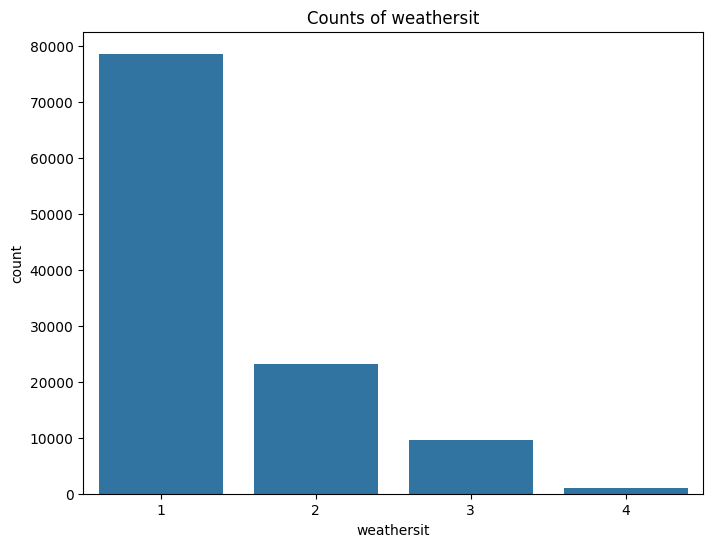

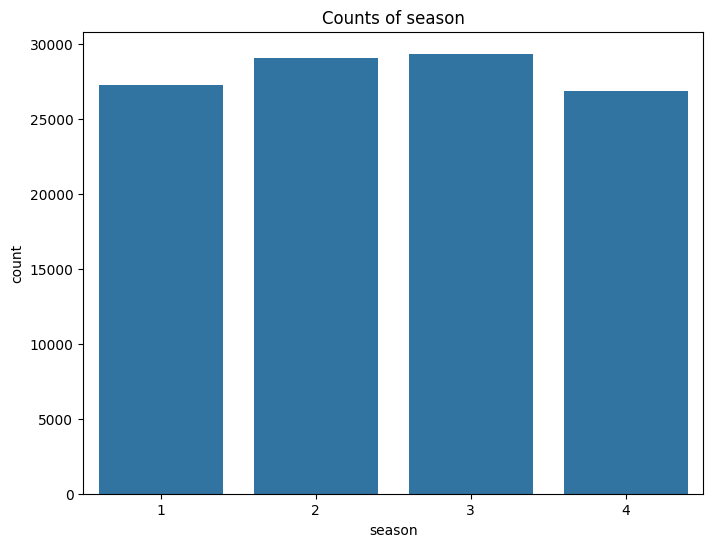

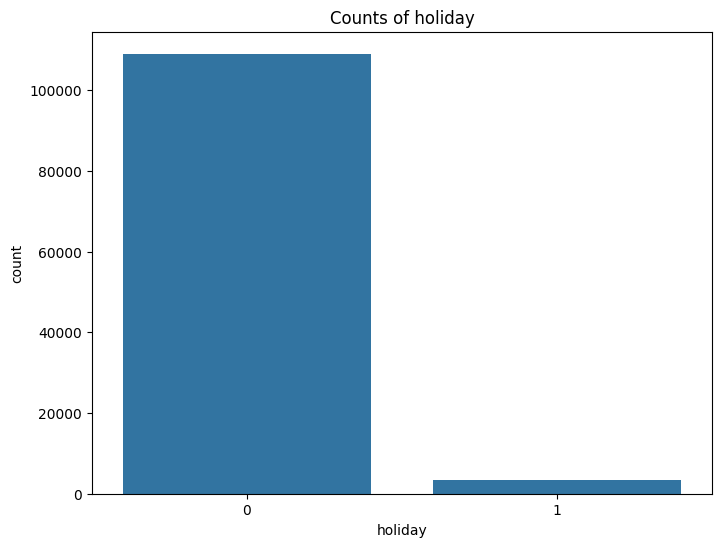

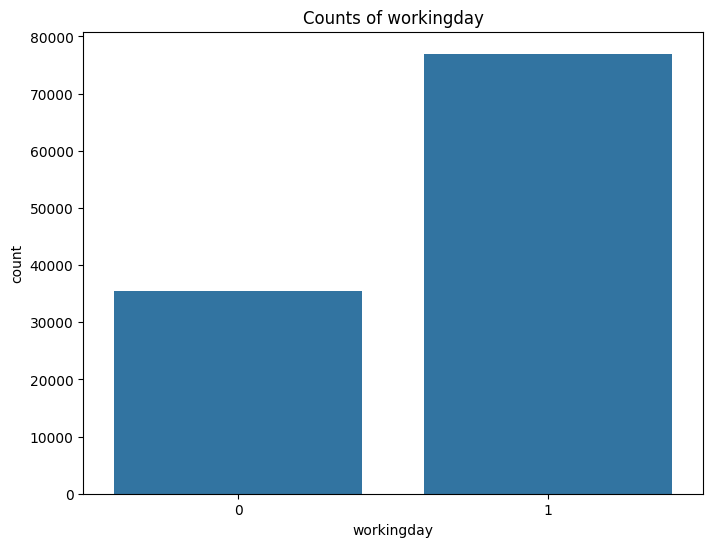

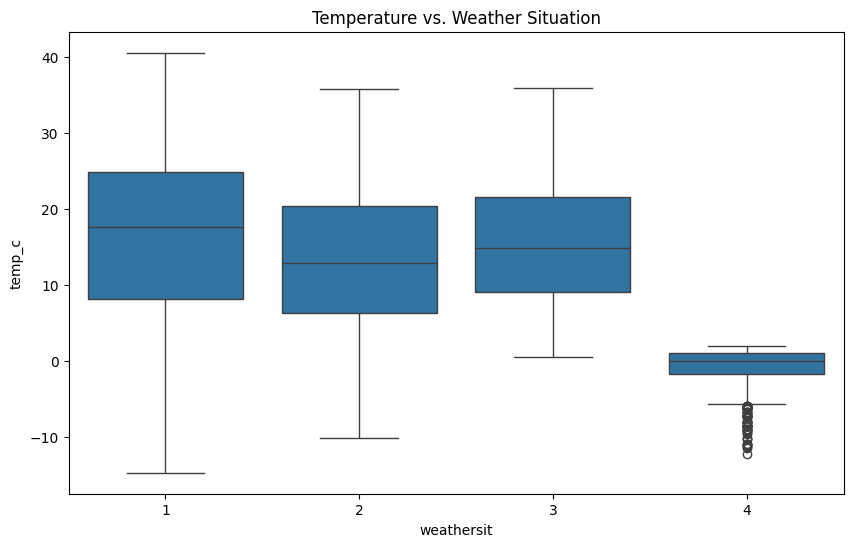

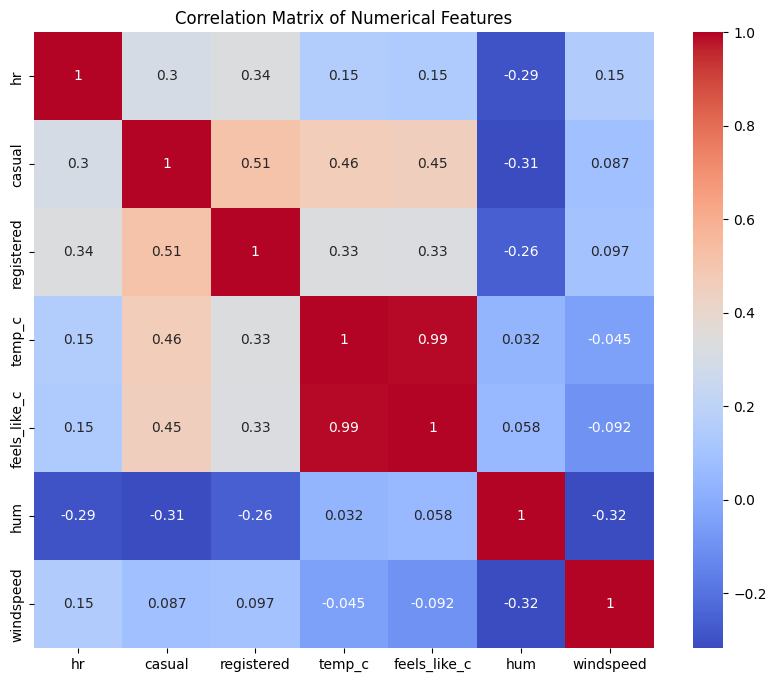

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
numerical_features = ['hr', 'casual', 'registered', 'temp_c', 'feels_like_c', 'hum', 'windspeed']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(bikes[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

# Plot relationships between numerical features and target variables (casual and registered)
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=feature, y='casual', data=bikes)
  plt.title(f'{feature} vs. Casual Riders')
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=feature, y='registered', data=bikes)
  plt.title(f'{feature} vs. Registered Riders')
  plt.show()

# Explore categorical features
categorical_features = ['weathersit', 'season', 'holiday', 'workingday']
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=bikes)
  plt.title(f'Counts of {feature}')
  plt.show()


# Example: Box plot of 'temp_c' across different weather situations
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='temp_c', data=bikes)
plt.title('Temperature vs. Weather Situation')
plt.show()

# Example: Heatmap of correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = bikes[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


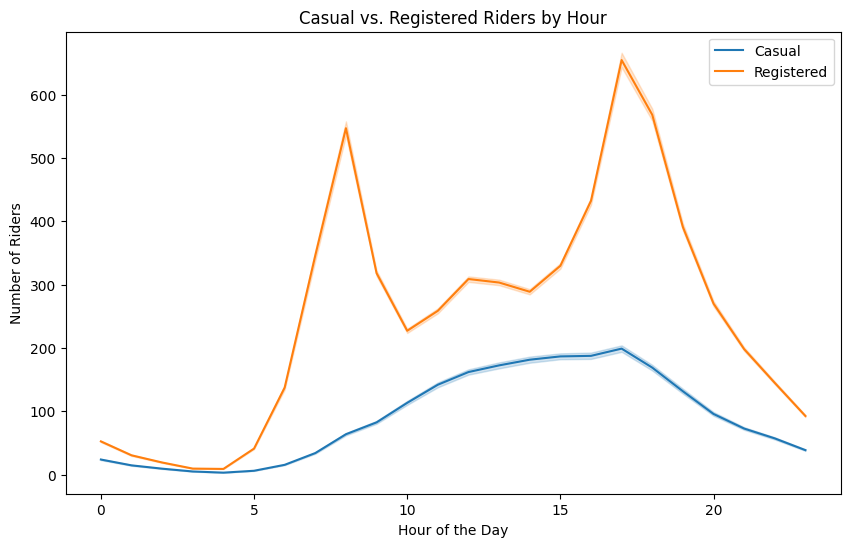

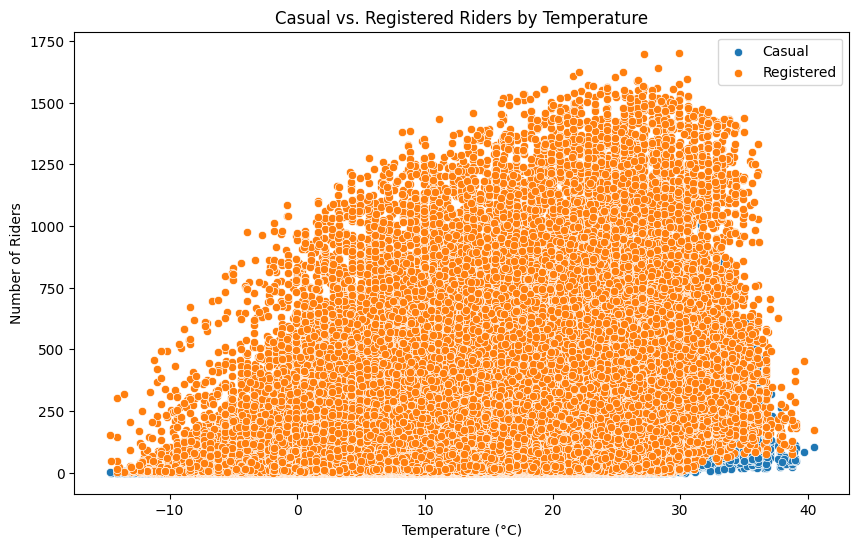

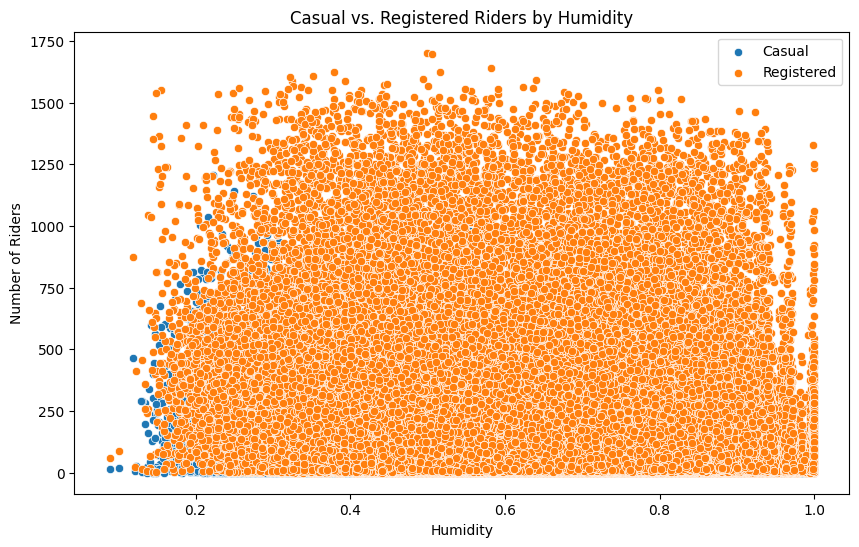

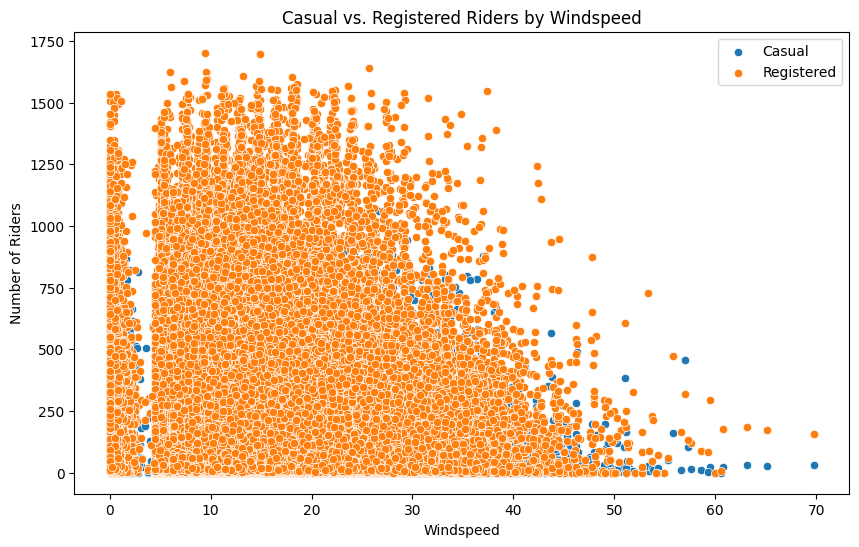

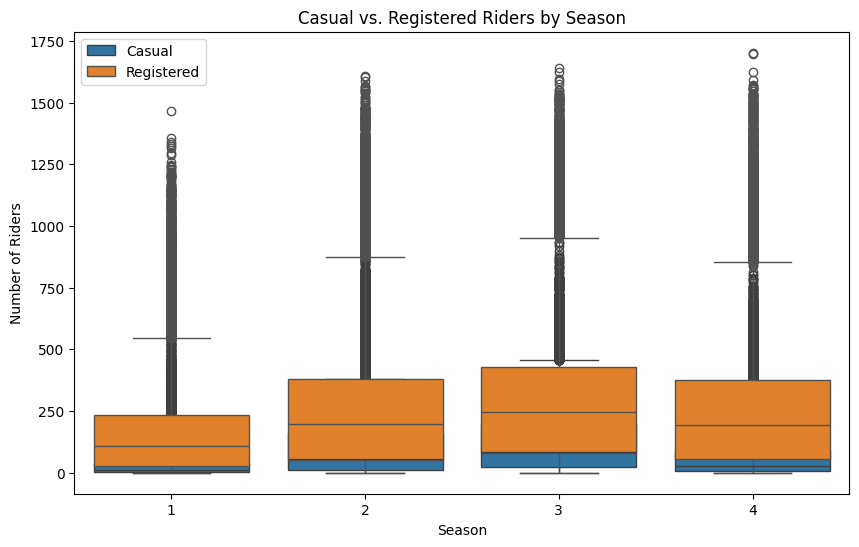

In [ ]:
import matplotlib.pyplot as plt
# Compare 'casual' and 'registered' riders across different features

# Comparison across hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='casual', data=bikes, label='Casual')
sns.lineplot(x='hr', y='registered', data=bikes, label='Registered')
plt.title('Casual vs. Registered Riders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Riders')
plt.legend()
plt.show()

# Comparison across temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_c', y='casual', data=bikes, label='Casual')
sns.scatterplot(x='temp_c', y='registered', data=bikes, label='Registered')
plt.title('Casual vs. Registered Riders by Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Riders')
plt.legend()
plt.show()

# Comparison across humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='casual', data=bikes, label='Casual')
sns.scatterplot(x='hum', y='registered', data=bikes, label='Registered')
plt.title('Casual vs. Registered Riders by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Number of Riders')
plt.legend()
plt.show()


# Comparison across windspeed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='casual', data=bikes, label='Casual')
sns.scatterplot(x='windspeed', y='registered', data=bikes, label='Registered')
plt.title('Casual vs. Registered Riders by Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Number of Riders')
plt.legend()
plt.show()

# Comparison across season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='casual', data=bikes, label='Casual')
sns.boxplot(x='season', y='registered', data=bikes, label='Registered')
plt.title('Casual vs. Registered Riders by Season')
plt.xlabel('Season')
plt.ylabel('Number of Riders')
plt.legend()
plt.show()


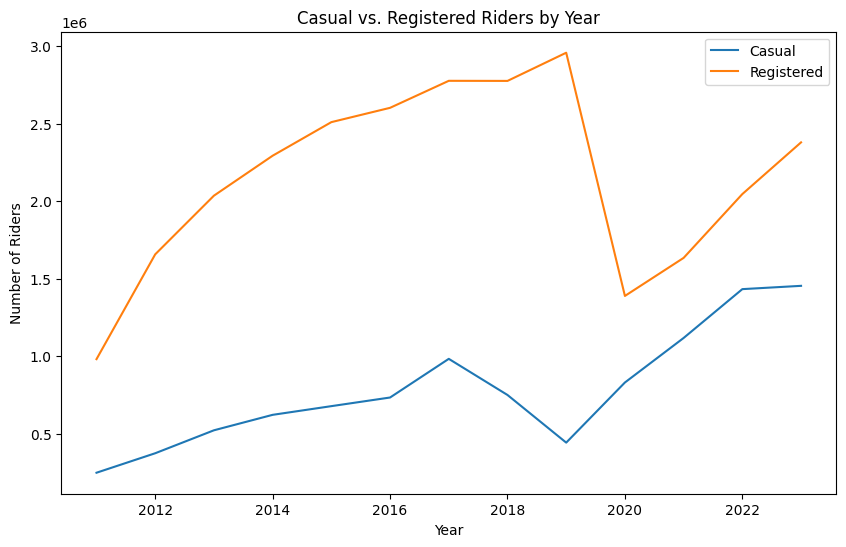

In [ ]:
# prompt: graph of casual vs registered riders based on date (dteday) but only use the year part of dteday

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'dteday' to datetime objects
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# Extract the year from 'dteday'
bikes['year'] = bikes['dteday'].dt.year

# Group data by year and sum casual and registered riders
yearly_riders = bikes.groupby('year').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_riders['year'], yearly_riders['casual'], label='Casual')
plt.plot(yearly_riders['year'], yearly_riders['registered'], label='Registered')
plt.xlabel('Year')
plt.ylabel('Number of Riders')
plt.title('Casual vs. Registered Riders by Year')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


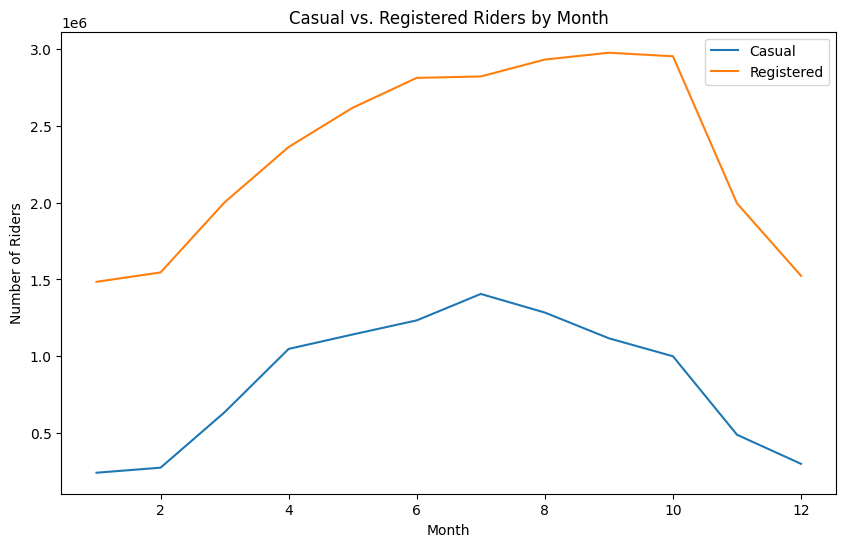

In [ ]:
# prompt: now change the graph to months not days of the month

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.info()

# ... (rest of your existing code)

# Convert 'dteday' to datetime objects
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# Extract the month from 'dteday'
bikes['month'] = bikes['dteday'].dt.month

# Group data by month and sum casual and registered riders
monthly_riders = bikes.groupby('month').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_riders['month'], monthly_riders['casual'], label='Casual')
plt.plot(monthly_riders['month'], monthly_riders['registered'], label='Registered')
plt.xlabel('Month')
plt.ylabel('Number of Riders')
plt.title('Casual vs. Registered Riders by Month')
plt.legend()
plt.show()
